# Decomposed_Learning_Results (CL* Algorithm)


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, kstest, shapiro, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# don't run this if you use google colab 
df =  pd.read_csv('data/Results.csv',index_col=False)

## Clean data

In [54]:
def round_data(data):
  return round(data, 3)

In [55]:
df = df[(df["STATES"]<=3840) & (df["STATES"]>300) ]

In [56]:
df = df.dropna(axis=1, how='all')
df = df.dropna()

In [57]:
# Calculate mean without outliers
from scipy import stats
def trimmed_mean(x):
  z = stats.zscore(x)
  d_z = x.loc[z<3,]
  return d_z.mean()

## Statistical Analysis

In [58]:
# @title Bins
bins = [300,600,900,1200,1500,1800,2100,2400, 3840]
labels = []

We cluster the benchmark into eight categories based on the FSM’s number of states to summerize the results and illusterate them.

In [59]:
# Data Distribution
print("Count:  ",df['FILE_NAME'].unique().size)
print("Min:    ",df.groupby('FILE_NAME').agg(min)['STATES'].min())
print("Max:    ",df.groupby('FILE_NAME').agg(min)['STATES'].max())

print("mean:   ", df.groupby('FILE_NAME').agg(min)['STATES'].mean())

print("std:    ", df.groupby('FILE_NAME').agg(min)['STATES'].std())

Count:   1
Min:     1152
Max:     1152
mean:    1152.0
std:     nan


C:\Users\Aryan\AppData\Local\Temp\ipykernel_19452\2303827582.py:3: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("Min:    ",df.groupby('FILE_NAME').agg(min)['STATES'].min())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_19452\2303827582.py:4: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("Max:    ",df.groupby('FILE_NAME').agg(min)['STATES'].max())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_19452\2303827582.py:6: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current

In [60]:
# calculate the progress 

df['CLSTAR_TOTAL_RST_progress'] = (1 - (df['CLSTAR_TOTAL_RST'] / df['CLSTAR_TOTAL_RST']))*100
df['CLSTAR_TOTAL_SYM_progress'] = (1 - (df['CLSTAR_TOTAL_SYM'] / df['CLSTAR_TOTAL_SYM']))*100

df['CLSTAR_MQ_SYM_progress'] = (1 - (df['CLSTAR_MQ_SYM'] / df['CLSTAR_MQ_SYM']))*100
df['CLSTAR_MQ_RST_progress'] = (1 - (df['CLSTAR_MQ_RST'] / df['CLSTAR_MQ_RST']))*100
df['CLSTAR_EQ_SYM_progress'] = (1 - (df['CLSTAR_EQ_SYM'] / df['CLSTAR_EQ_SYM']))*100
df['CLSTAR_EQ_RST_progress'] = (1 - (df['CLSTAR_EQ_RST'] / df['CLSTAR_EQ_RST']))*100


In [61]:
# @title Check for normal
for i in range(0, len(bins)-1):
    data = df[df['STATES']>bins[i] & (df['STATES']<=bins[i+1])]
    states_count = data.loc[:,'STATES']
    input_count = data.loc[:,'INPUTS']
    # print(len(data))
    lstar_resets_count = data.loc[:,  'CLSTAR_TOTAL_RST']
    CLSTAR_resets_count = data.loc[:, 'CLSTAR_TOTAL_RST']
    lstar_symbols_count = data.loc[:, 'CLSTAR_TOTAL_SYM']
    CLSTAR_symbols_count = data.loc[:,'CLSTAR_TOTAL_SYM']
    print(bins[i],  '-', bins[i+1])
    print(kstest(states_count,'norm'))
    print(kstest(lstar_resets_count,'norm'))
    print(kstest(CLSTAR_resets_count,'norm'))
    print(kstest(lstar_symbols_count,'norm'))
    print(kstest(CLSTAR_symbols_count,'norm'))

    print(shapiro(states_count))
    print(shapiro(lstar_resets_count))
    print(shapiro(CLSTAR_resets_count))
    print(shapiro(lstar_symbols_count))
    print(shapiro(CLSTAR_symbols_count))




300 - 600
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1152, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=34453, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=34453, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=5060996, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=5060996, statistic_sign=-1)
ShapiroResult(statistic=1.0, pvalue=1.0)
ShapiroResult(statistic=0.9204906048012492, pvalue=0.5089014780083871)
ShapiroResult(statistic=0.9204906048012492, pvalue=0.5089014780083871)
ShapiroResult(statistic=0.9210858425574077, pvalue=0.5132157728683764)
ShapiroResult(statistic=0.9210858425574077, pvalue=0.5132157728683764)
600 - 900
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1152, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=34453, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location

C:\Users\Aryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [62]:
# @title Cluster Items

grouped = df.groupby(pd.cut(df["STATES"],bins))
df3 = grouped.agg(
    # states = pd.NamedAgg(column='STATES', aggfunc="min"),
    inputs=pd.NamedAgg(column="INPUTS", aggfunc='median'),

    LSTAR_total_sym_median=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc='median'),
    LSTAR_total_sym_mean=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc='mean'),
    LSTAR_total_sym_std=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc="std"),
    LSTAR_total_reset_median=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc='median'),
    LSTAR_total_reset_mean=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc='mean'),
    LSTAR_total_reset_std=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc="std"),
    LSTAR_mq_sym_mean=pd.NamedAgg(column='LSTAR_MQ_SYM', aggfunc='median'),
    LSTAR_mq_sym_std=pd.NamedAgg(column='LSTAR_MQ_SYM', aggfunc="std"),
    LSTAR_mq_reset_mean=pd.NamedAgg(column='LSTAR_MQ_RST', aggfunc='median'),
    LSTAR_mq_reset_std=pd.NamedAgg(column='LSTAR_MQ_RST', aggfunc="std"),
    LSTAR_eq_sym_mean=pd.NamedAgg(column='LSTAR_EQ_SYM', aggfunc='median'),
    LSTAR_eq_sym_std=pd.NamedAgg(column='LSTAR_EQ_SYM', aggfunc="std"),
    LSTAR_eq_reset_mean=pd.NamedAgg(column='LSTAR_EQ_RST', aggfunc='median'),
    LSTAR_eq_reset_std=pd.NamedAgg(column='LSTAR_EQ_RST', aggfunc="std"),
    LSTAR_eqs=pd.NamedAgg(column='LSTAR_EQs', aggfunc='median'),

    CLSTAR_total_sym_median=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc='mean'),
    CLSTAR_total_sym_mean=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc='median'),
    CLSTAR_total_sym_std=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc="std"),
    CLSTAR_total_reset_median=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc='median'),
    CLSTAR_total_reset_mean=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc='mean'),
    CLSTAR_total_reset_std=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc="std"),
    CLSTAR_mq_sym_mean=pd.NamedAgg(column='CLSTAR_MQ_SYM', aggfunc='median'),
    CLSTAR_mq_sym_std=pd.NamedAgg(column='CLSTAR_MQ_SYM', aggfunc="std"),
    CLSTAR_mq_reset_mean=pd.NamedAgg(column='CLSTAR_MQ_RST', aggfunc='median'),
    CLSTAR_mq_reset_std=pd.NamedAgg(column='CLSTAR_MQ_RST', aggfunc="std"),
    CLSTAR_eq_sym_mean=pd.NamedAgg(column='CLSTAR_EQ_SYM', aggfunc='median'),
    CLSTAR_eq_sym_std=pd.NamedAgg(column='CLSTAR_EQ_SYM', aggfunc="std"),
    CLSTAR_eq_reset_mean=pd.NamedAgg(column='CLSTAR_EQ_RST', aggfunc='median'),
    CLSTAR_eq_reset_std=pd.NamedAgg(column='CLSTAR_EQ_RST', aggfunc="std"),
    CLSTAR_eqs=pd.NamedAgg(column='CLSTAR_EQs', aggfunc='median'),
    CLSTAR_components=pd.NamedAgg(column='CLSTAR_COMPONENTS', aggfunc='median'),
    CLSTAR_rounds=pd.NamedAgg(column='CLSTAR_ROUNDS', aggfunc='median'),

).reset_index()


C:\Users\Aryan\AppData\Local\Temp\ipykernel_19452\2040017366.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(pd.cut(df["STATES"],bins))


In [63]:
# Progress
df3['CLSTAR_TOTAL_SYM_progress'] = (1 - (df3['CLSTAR_total_sym_mean'] / df3['LSTAR_total_sym_mean']))*100
df3['CLSTAR_TOTAL_RST_progress'] = (1 - (df3['CLSTAR_total_reset_mean'] / df3['LSTAR_total_reset_mean']))*100
df3['CLSTAR_MQ_SYM_progress'] = (1 - (df3['CLSTAR_mq_sym_mean'] / df3['LSTAR_mq_sym_mean']))*100
df3['CLSTAR_MQ_RST_progress'] = (1 - (df3['CLSTAR_mq_reset_mean'] / df3['LSTAR_mq_reset_mean']))*100
df3['CLSTAR_EQ_SYM_progress'] = (1 - (df3['CLSTAR_eq_sym_mean'] / df3['LSTAR_eq_sym_mean']))*100
df3['CLSTAR_EQ_RST_progress'] = (1 - (df3['CLSTAR_eq_reset_mean'] / df3['LSTAR_eq_reset_mean']))*100

In [64]:
# @title Pvalue 
pvalue_info = {'STATES':[],
'CLSTAR_TOTAL_SYM_pvalue':[],
'CLSTAR_TOTAL_RST_pvalue':[],
              }
for index, row in df3.iterrows():
  data_range = row['STATES']
  filtered_df = df[(df['STATES']<data_range.right) & (df['STATES']>=data_range.left)]
  mq_sym_ttest = ttest_rel(filtered_df.loc[:,'CLSTAR_TOTAL_SYM'], filtered_df.loc[:,'LSTAR_TOTAL_SYM'], alternative='less').pvalue
  eq_reset_ttest = ttest_rel(filtered_df.loc[:,'CLSTAR_TOTAL_RST'], filtered_df.loc[:,'LSTAR_TOTAL_RST'], alternative='less').pvalue

  pvalue_info['STATES'].append(data_range)
  pvalue_info['CLSTAR_TOTAL_SYM_pvalue'].append(mq_sym_ttest)
  pvalue_info['CLSTAR_TOTAL_RST_pvalue'].append(eq_reset_ttest)

pvalue_df = pd.DataFrame(pvalue_info)
final_df = pd.merge(df3, pvalue_df,how='right', on='STATES')



In [65]:
final_df['CLSTAR_TOTAL_SYM_pvalue']

0         NaN
1         NaN
2    0.999767
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
Name: CLSTAR_TOTAL_SYM_pvalue, dtype: float64

In [66]:
final_df.columns

Index(['STATES', 'inputs', 'LSTAR_total_sym_median', 'LSTAR_total_sym_mean',
       'LSTAR_total_sym_std', 'LSTAR_total_reset_median',
       'LSTAR_total_reset_mean', 'LSTAR_total_reset_std', 'LSTAR_mq_sym_mean',
       'LSTAR_mq_sym_std', 'LSTAR_mq_reset_mean', 'LSTAR_mq_reset_std',
       'LSTAR_eq_sym_mean', 'LSTAR_eq_sym_std', 'LSTAR_eq_reset_mean',
       'LSTAR_eq_reset_std', 'LSTAR_eqs', 'CLSTAR_total_sym_median',
       'CLSTAR_total_sym_mean', 'CLSTAR_total_sym_std',
       'CLSTAR_total_reset_median', 'CLSTAR_total_reset_mean',
       'CLSTAR_total_reset_std', 'CLSTAR_mq_sym_mean', 'CLSTAR_mq_sym_std',
       'CLSTAR_mq_reset_mean', 'CLSTAR_mq_reset_std', 'CLSTAR_eq_sym_mean',
       'CLSTAR_eq_sym_std', 'CLSTAR_eq_reset_mean', 'CLSTAR_eq_reset_std',
       'CLSTAR_eqs', 'CLSTAR_components', 'CLSTAR_rounds',
       'CLSTAR_TOTAL_SYM_progress', 'CLSTAR_TOTAL_RST_progress',
       'CLSTAR_MQ_SYM_progress', 'CLSTAR_MQ_RST_progress',
       'CLSTAR_EQ_SYM_progress', 'CLSTAR_EQ_R

## Tables 

In [67]:
# @title Table 1
final_df[["STATES", "LSTAR_total_reset_mean", "LSTAR_total_reset_std", "CLSTAR_total_reset_mean", "CLSTAR_total_reset_std", "CLSTAR_TOTAL_RST_progress" ,"CLSTAR_TOTAL_RST_pvalue" ]]

,STATES,LSTAR_total_reset_mean,LSTAR_total_reset_std,CLSTAR_total_reset_mean,CLSTAR_total_reset_std,CLSTAR_TOTAL_RST_progress,CLSTAR_TOTAL_RST_pvalue
0,"(300, 600]",NaN,NaN,NaN,NaN,NaN,NaN
1,"(600, 900]",NaN,NaN,NaN,NaN,NaN,NaN
2,"(900, 1200]",609931.0,0.0,40280.0,3435.998778,93.395974,8.591880e-13
3,"(1200, 1500]",NaN,NaN,NaN,NaN,NaN,NaN
4,"(1500, 1800]",NaN,NaN,NaN,NaN,NaN,NaN
5,"(1800, 2100]",NaN,NaN,NaN,NaN,NaN,NaN
6,"(2100, 2400]",NaN,NaN,NaN,NaN,NaN,NaN
7,"(2400, 3840]",NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# @title Table 2
final_df[["STATES", "LSTAR_total_sym_mean", "LSTAR_total_sym_std", "CLSTAR_total_sym_mean", "CLSTAR_total_sym_std", "CLSTAR_TOTAL_SYM_progress" ,"CLSTAR_TOTAL_SYM_pvalue" ]]

,STATES,LSTAR_total_sym_mean,LSTAR_total_sym_std,CLSTAR_total_sym_mean,CLSTAR_total_sym_std,CLSTAR_TOTAL_SYM_progress,CLSTAR_TOTAL_SYM_pvalue
0,"(300, 600]",NaN,NaN,NaN,NaN,NaN,NaN
1,"(600, 900]",NaN,NaN,NaN,NaN,NaN,NaN
2,"(900, 1200]",4.239796e+06,795.097394,5930966.0,513090.273665,-39.887993,0.999767
3,"(1200, 1500]",NaN,NaN,NaN,NaN,NaN,NaN
4,"(1500, 1800]",NaN,NaN,NaN,NaN,NaN,NaN
5,"(1800, 2100]",NaN,NaN,NaN,NaN,NaN,NaN
6,"(2100, 2400]",NaN,NaN,NaN,NaN,NaN,NaN
7,"(2400, 3840]",NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
final_df.to_csv("Results_summerized.csv")

# Plots

In [70]:
sns.set(rc={'figure.figsize':(15,6)})

C:\Users\Aryan\AppData\Local\Temp\ipykernel_19452\1459455666.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['state_range'] = pd.cut(d2['STATES'], bins= bins)


C:\Users\Aryan\AppData\Local\Temp\ipykernel_19452\1459455666.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['state_range'] = pd.cut(d1['STATES'], bins= bins)


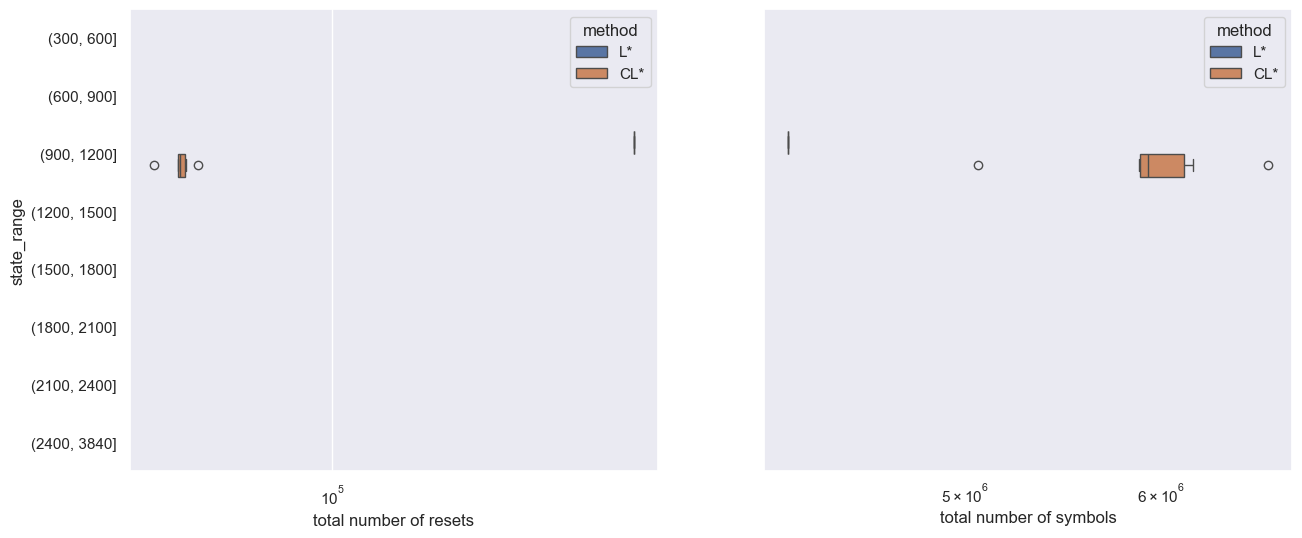

In [71]:
#  @title Fig 2. The total number of input symbols and resets in the CL∗ and L∗ methods
fig, axs = plt.subplots(ncols=2)

d2 = df[['STATES', 'LSTAR_TOTAL_RST', 'CLSTAR_TOTAL_RST']]
d2['state_range'] = pd.cut(d2['STATES'], bins= bins)
d2 = d2.set_index('state_range')

d2[['L*',  'CL*']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST']] 

d2 = d2[['L*',  'CL*']].stack().reset_index()
d2 = d2.rename(columns={"level_1": "method", 0: "total number of resets"})

g1 = sns.boxplot(y = d2['state_range'],
			x = d2['total number of resets'],
			hue = d2['method'],
       showcaps=True,orient="h", ax=axs[0]).set_xscale('log')


d1 = df[['STATES', 'LSTAR_TOTAL_SYM', 'CLSTAR_TOTAL_SYM']]
d1['state_range'] = pd.cut(d1['STATES'], bins= bins)
d1 = d1.set_index('state_range')
d1[['L*',  'CL*']] = d1[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM']] 
d1 = d1[['L*',  'CL*']].stack().reset_index()
d1 = d1.rename(columns={"level_1": "method", 0: "total number of symbols"})

g2 = sns.boxplot(y = d1['state_range'],
			x = d1['total number of symbols'],
			hue = d1['method'],
       showcaps=True,orient="h", ax=axs[1])
g2.set_xscale('log')

g2.set(yticklabels=[])
g2.set(ylabel=None)
g2.tick_params(bottom=False) 
# plt.grid()
# plt.show()


C:\Users\Aryan\AppData\Local\Temp\ipykernel_19452\440006197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_19452\440006197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykerne

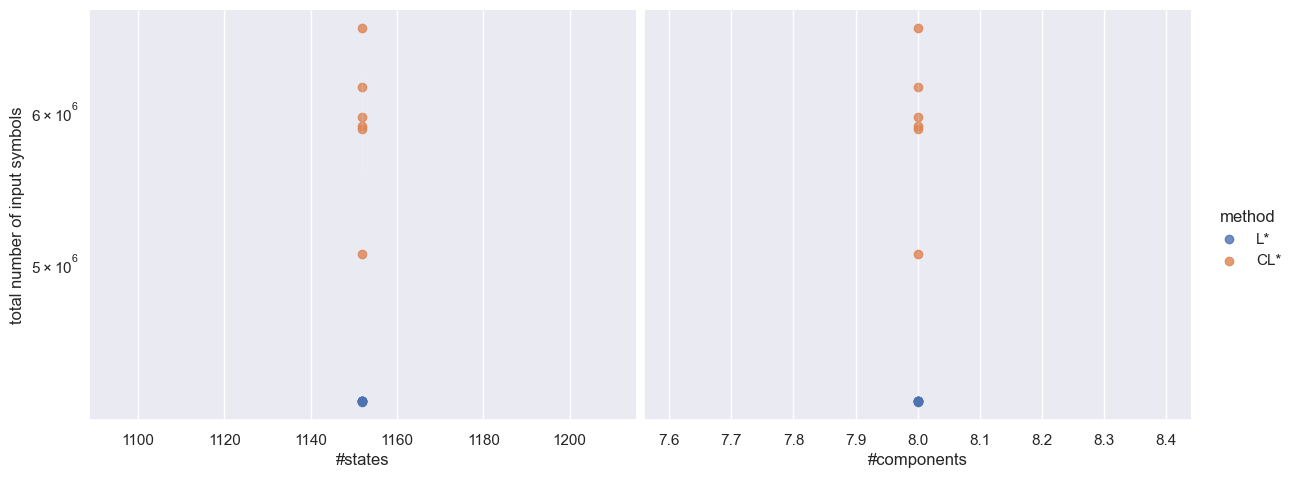

In [72]:
# @title Fig.3: The effect of FSM size in terms of number of components and states on total number of input symbols.
d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_TOTAL_SYM', 'CLSTAR_TOTAL_SYM']]

d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'CL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of input symbols"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of input symbols"],
             hue="method", height=5, aspect=1.2, kind="reg" );
plt.yscale('log')


C:\Users\Aryan\AppData\Local\Temp\ipykernel_19452\1651643529.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_19452\1651643529.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipyker

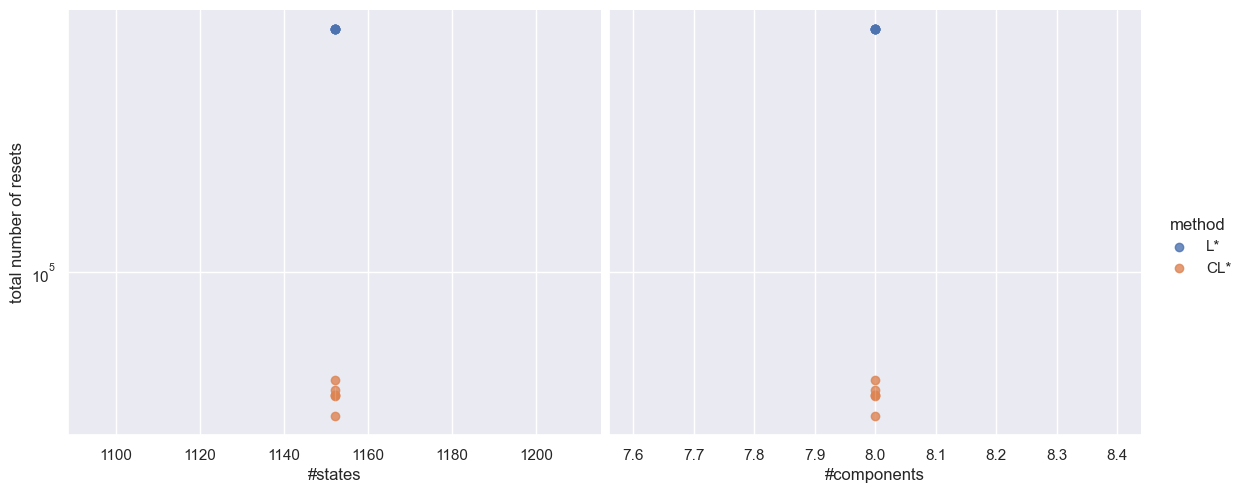

In [73]:
# @title Fig.4: The effect of FSM size in terms of number of components and states on total number of input resets.

d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_TOTAL_RST', 'CLSTAR_TOTAL_RST']]

d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'CL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of resets"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of resets"],
             hue="method", height=5, aspect=1.2, kind="reg" );
plt.yscale('log')
